<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/ml_lab_week_5_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [3]:
data = pd.read_csv("Housing.csv")

simple linear regression

In [4]:
X = data[['area']]
y = data['price']

train the linear regression model

In [5]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
y_pred=model.predict(X)

In [8]:
intercept = model.intercept_
slope = model.coef_[0]

In [9]:
print("Intercept (b0):", intercept)
print("Slope (b1):", slope)
print(f"\n👉 Interpretation: For every 1 sq. ft. increase in area, price increases by about {slope:.2f} units.")


Intercept (b0): 2387308.48239643
Slope (b1): 461.97489427278344

👉 Interpretation: For every 1 sq. ft. increase in area, price increases by about 461.97 units.


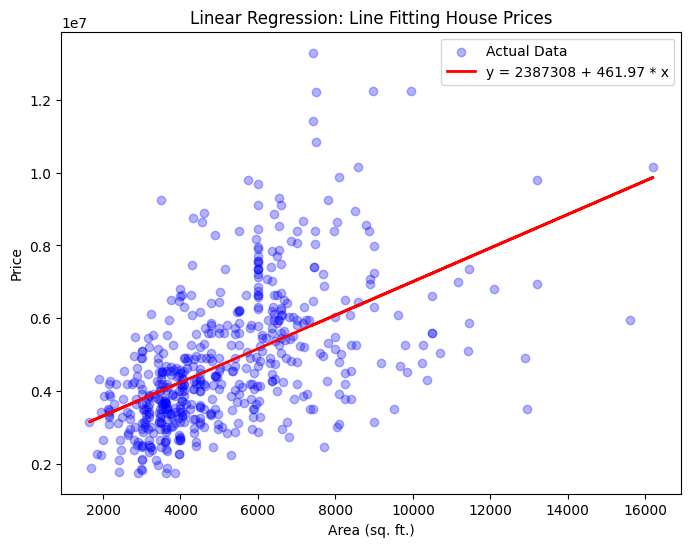

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', alpha=0.3, label="Actual Data")
plt.plot(X, y_pred, color='red', linewidth=2, label=f"y = {intercept:.0f} + {slope:.2f} * x")
plt.xlabel("Area (sq. ft.)")
plt.ylabel("Price")
plt.title("Linear Regression: Line Fitting House Prices")
plt.legend()
plt.show()


In [11]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

In [12]:
print("\nModel Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


Model Evaluation Metrics:
MSE: 2488861398180.6567
MAE: 1172305.5113148908
RMSE: 1577612.5627607866


multilinear regression

In [13]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [14]:
X_multi = data_encoded.drop('price', axis=1)
y_multi = data_encoded['price']

In [15]:
model_multi = LinearRegression()
model_multi.fit(X_multi, y_multi)
y_pred_multi = model_multi.predict(X_multi)

In [16]:
print("\n----- MULTIPLE LINEAR REGRESSION -----")
print("Intercept (b0):", model_multi.intercept_)
print("Coefficients (b1, b2, ...):")
for col, coef in zip(X_multi.columns, model_multi.coef_):
    print(f"{col}: {coef}")


----- MULTIPLE LINEAR REGRESSION -----
Intercept (b0): 42771.693918105215
Coefficients (b1, b2, ...):
area: 244.13938627175474
bedrooms: 114787.560184679
bathrooms: 987668.1072860265
stories: 450848.0028590396
parking: 277107.1013421606
mainroad_yes: 421272.58872560074
guestroom_yes: 300525.8596361034
basement_yes: 350106.90413615777
hotwaterheating_yes: 855447.1453970436
airconditioning_yes: 864958.3113174698
prefarea_yes: 651543.7998630109
furnishingstatus_semi-furnished: -46344.61997996751
furnishingstatus_unfurnished: -411234.38615716645


In [17]:
mse = mean_squared_error(y_multi, y_pred_multi)
mae = mean_absolute_error(y_multi, y_pred_multi)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 1111187722284.4001
MAE: 775054.3287400283
RMSE: 1054128.892633344


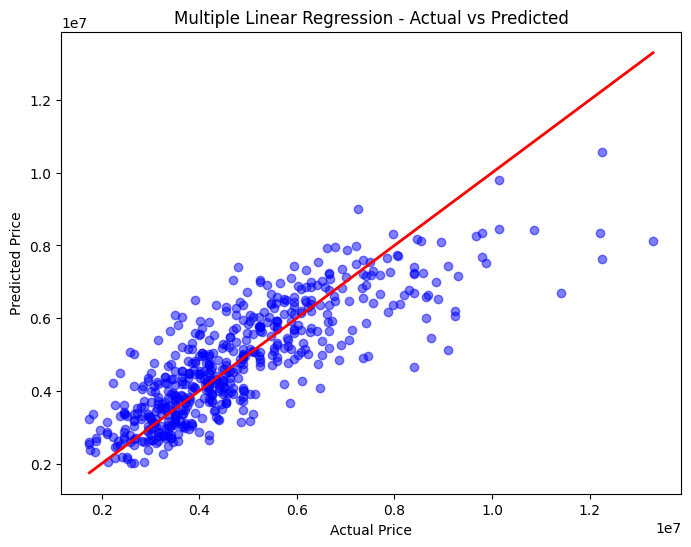

In [18]:
# Plot Predicted vs Actual
plt.figure(figsize=(8,6))
plt.scatter(y_multi, y_pred_multi, color='blue', alpha=0.5)
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Multiple Linear Regression - Actual vs Predicted")
plt.show()


logistic regression

In [19]:
# Create a classification target:
# Let's say houses with price > median are "Expensive (1)" else "Not Expensive (0)"
median_price = data['price'].median()
data['expensive'] = (data['price'] > median_price).astype(int)

In [20]:
X_log = data_encoded.drop('price', axis=1)
y_log = data['expensive']

In [23]:
from sklearn.linear_model import LogisticRegression


In [24]:
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_log, y_log)
y_pred_log = model_log.predict(X_log)

In [26]:
from sklearn.metrics import accuracy_score, classification_report


In [27]:
print("\n----- LOGISTIC REGRESSION -----")
print("Accuracy:", accuracy_score(y_log, y_pred_log))
print("\nClassification Report:\n", classification_report(y_log, y_pred_log))


----- LOGISTIC REGRESSION -----
Accuracy: 0.8422018348623853

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       275
           1       0.86      0.81      0.84       270

    accuracy                           0.84       545
   macro avg       0.84      0.84      0.84       545
weighted avg       0.84      0.84      0.84       545

